Implement a Multilayer Perceptron Model to predicate a respondents country based on their survey responses.

# Packages

In [0]:
import pandas as pd
import numpy as np
import os

from google.colab import drive
from google.colab import files

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils


import matplotlib.pyplot as plt 

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from matplotlib.font_manager import FontProperties




In [0]:
print(tf.__version__)

2.2.0-rc3


In [2]:
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Read in Data

In [4]:
data = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/data/transformed_data_basic.csv')
data.shape

(750305, 110)

# Train/Test Split

In [14]:
# 70 /30
#country_encoded = preprocessing.LabelEncoder().fit_transform(data['country'])
data['country_encoded'] = preprocessing.LabelEncoder().fit_transform(data['country'])
# All Columns
col_indexes = list(range(0, 100, 1)) + list(range(102, 106, 1))
# Just Answer to Questions
col_indexes = list(range(0, 50, 1))
print(data.columns[col_indexes])
x_data = data[data.columns[col_indexes]]

scale = np.max(x_data)
x_data /= scale

mean = np.std(x_data)
x_data -= mean

y_data = data['country_encoded'].values

print(data.columns[100:110])

#print(x_data.columns)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)

y_train = np_utils.to_categorical(y_train)

input_dim = x_train.shape[1]
nb_classes = y_train.shape[1]

print('Number of Input Dimension:', input_dim)
print('Number of Classes', nb_classes)

print('Train X: ', x_train.shape)
print('Train Y: ', y_train.shape)
print('Test X: ', x_test.shape)
print('Test Y: ', y_test.shape)
x_train.head()

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')
Index(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object')
Number of Input Dimension: 50
Number of Classes 17
Train X:  (525213, 50)
Train Y:  (525213, 17)
Test X:  (225092, 50)
Test Y:  (225092,)


EXT1      EXT2      EXT3  ...      OPN8      OPN9     OPN10
469827 -0.125721  0.349488 -0.092853  ... -0.111188  0.515403  0.509484
430747 -0.625721 -0.150512 -0.092853  ... -0.111188  0.515403  0.009484
435416  0.374279  0.349488  0.407147  ... -1.111188  0.015403  0.509484
337505 -1.625721 -1.150512 -1.092853  ...  0.388812 -0.484597 -0.490516
45791  -0.125721 -1.650512 -0.592853  ...  0.388812  0.515403  0.509484

[5 rows x 50 columns]

# Simple MLP

## Model Structure

In [0]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

## Compile Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## Train Model

In [17]:

model.fit(x_train, y_train, epochs = 8, batch_size = 16, validation_split = 0.1, verbose = 2)

Train on 472691 samples, validate on 52522 samples
Epoch 1/8
 - 48s - loss: 1.4414 - accuracy: 0.6304 - val_loss: 1.4141 - val_accuracy: 0.6329
Epoch 2/8
 - 50s - loss: 1.4169 - accuracy: 0.6313 - val_loss: 1.4087 - val_accuracy: 0.6330
Epoch 3/8
 - 48s - loss: 1.4098 - accuracy: 0.6316 - val_loss: 1.4029 - val_accuracy: 0.6337
Epoch 4/8
 - 48s - loss: 1.4048 - accuracy: 0.6321 - val_loss: 1.4041 - val_accuracy: 0.6332
Epoch 5/8
 - 48s - loss: 1.4015 - accuracy: 0.6323 - val_loss: 1.4094 - val_accuracy: 0.6335
Epoch 6/8
 - 48s - loss: 1.3988 - accuracy: 0.6324 - val_loss: 1.4015 - val_accuracy: 0.6339
Epoch 7/8
 - 48s - loss: 1.3962 - accuracy: 0.6328 - val_loss: 1.4065 - val_accuracy: 0.6328
Epoch 8/8
 - 48s - loss: 1.3941 - accuracy: 0.6333 - val_loss: 1.4050 - val_accuracy: 0.6332


## Predictions

In [18]:
y_pred_1 = model.predict_classes(x_test, verbose=1)
y_pred_prob = model.predict_proba(x_test, verbose=1)
y_pred_prob

225092/225092 [==============================] - 4s 18us/step


array([[0.0648194 , 0.01358707, 0.06728008, ..., 0.06427997, 0.00619762,
        0.39249313],
       [0.05277082, 0.03690765, 0.06433801, ..., 0.00857549, 0.00791666,
        0.41079742],
       [0.03750835, 0.00383278, 0.07081186, ..., 0.00231235, 0.00765119,
        0.7079505 ],
       ...,
       [0.06765023, 0.00267415, 0.05915476, ..., 0.00598146, 0.05401962,
        0.46044227],
       [0.04455628, 0.00711056, 0.0810502 , ..., 0.00881197, 0.00394473,
        0.72459656],
       [0.04575027, 0.0091282 , 0.07970025, ..., 0.04184081, 0.00415791,
        0.65892357]], dtype=float32)

## Evaluation

In [0]:
y_pred = y_pred_1


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred))

Accuracy: 0.631484015424804
Recall: 0.631484015424804
Precision: 0.47448796379155767
F1 Score: 0.5018791532891731
MCC: 0.10102957339693508


# Experiment


## Experiment with Different Number of Features Used

In [0]:
feature_exp = pd.DataFrame(columns = ['feature_count_used', 'features_used', 'accuracy', 'recall', 'precision', 'f1_score', 'mcc'],
                            index = [list(range(100))])
feature_exp.head()

In [0]:
for col in range(1, 100, 1):
  print(col)
  x_data = data[data.columns[0:col]]
  y_data = data['country_encoded'].values
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(x_train, y_train)
  #Predict the response for test dataset
  y_pred = gnb.predict(x_test)
  
  feature_exp.iloc[col]['feature_count_used'] = col
  feature_exp.iloc[col]['features_used'] = ','.join(map(str, x_data.columns))
  feature_exp.iloc[col]['accuracy'] = metrics.accuracy_score(y_test, y_pred)
  feature_exp.iloc[col]['recall'] = metrics.recall_score(y_test, y_pred, average = 'weighted')
  feature_exp.iloc[col]['precision'] = metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0)
  feature_exp.iloc[col]['f1_score'] = metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  feature_exp.iloc[col]['mcc'] = metrics.matthews_corrcoef(y_test, y_pred)



In [0]:
feature_exp.head(100)

feature_count_used  ...    f1_score
0                 NaN  ...         NaN
1                   1  ...    0.406859
2                   2  ...    0.406859
3                   3  ...    0.406859
4                   4  ...    0.406859
..                ...  ...         ...
95                 95  ...  0.00129969
96                 96  ...  0.00128615
97                 97  ...  0.00132814
98                 98  ...  0.00128709
99                 99  ...  0.00133857

[100 rows x 6 columns]

In [0]:
print(feature_exp.head(100))
feature_exp['accuracy'] == max(feature_exp['accuracy'].dropna())
#feature_exp.index(feature_exp['accuracy'] == max(feature_exp['accuracy'].dropna()))

   feature_count_used  ...    f1_score
0                 NaN  ...         NaN
1                   1  ...    0.406859
2                   2  ...    0.406859
3                   3  ...    0.406859
4                   4  ...    0.406859
..                ...  ...         ...
95                 95  ...  0.00129969
96                 96  ...  0.00128615
97                 97  ...  0.00132814
98                 98  ...  0.00128709
99                 99  ...  0.00133857

[100 rows x 6 columns]


0     False
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: accuracy, Length: 100, dtype: bool

## Experiment with Different Number of PCA Components

In [0]:
pca_exp = pd.DataFrame(columns = ['pc_count', 'pc_variance', 'accuracy', 'recall', 'precision', 'f1_score', 'mcc'],
                            index = [list(range(1,51))])
pca_exp.head()

In [0]:
for pc_count in list(range(1,51,1)):
  print(pc_count)
  pca = PCA(n_components = pc_count)
  principal_components = pca.fit_transform(data[data.columns[range(50)]])
  pca_exp.iloc[pc_count]['pc_count'] = pca.n_components
  pca_exp.iloc[pc_count]['pc_variance'] = sum(pca.explained_variance_ratio_)
  
  x_data = principal_components
  y_data = data['country_encoded'].values
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=109)
  #Create a Gaussian Classifier
  gnb = GaussianNB()
  #Train the model using the training sets
  gnb.fit(x_train, y_train)
  #Predict the response for test dataset
  y_pred = gnb.predict(x_test)
  
  pca_exp.iloc[pc_count]['accuracy'] = metrics.accuracy_score(y_test, y_pred)
  pca_exp.iloc[pc_count]['recall'] = metrics.recall_score(y_test, y_pred, average = 'weighted')
  pca_exp.iloc[pc_count]['precision'] = metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=0)
  pca_exp.iloc[pc_count]['f1_score'] = metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  pca_exp.iloc[pc_count]['mcc'] = metrics.matthews_corrcoef(y_test, y_pred)


In [0]:
pca_exp.head()

pc_count pc_variance  accuracy    recall precision  f1_score
1      NaN         NaN       NaN       NaN       NaN       NaN
2        1    0.163046  0.564073  0.564073  0.318179  0.406859
3        2    0.272498  0.564073  0.564073  0.318179  0.406859
4        3     0.35401  0.564073  0.564073  0.318179  0.406859
5        4    0.416912  0.564073  0.564073  0.318179  0.406859

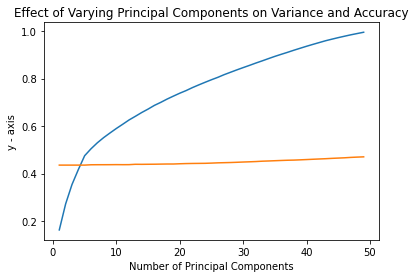

In [0]:
plt.plot(pca_exp['pc_count'], pca_exp['pc_variance']) 
plt.plot(pca_exp['pc_count'], 1- pca_exp['accuracy']) 
  
# naming the x axis 
plt.xlabel('Number of Principal Components') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Effect of Varying Principal Components on Variance and Accuracy') 
  
# function to show the plot 
plt.show() 

# Plot ROC Curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


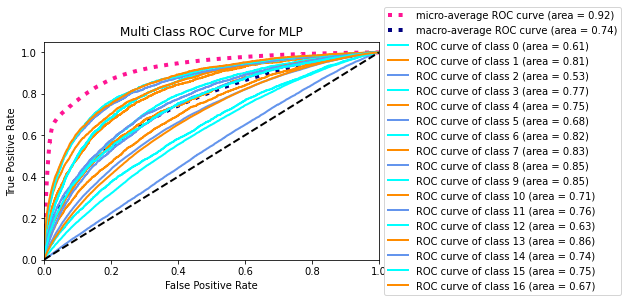

<Figure size 1440x720 with 0 Axes>

In [65]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# Add noisy features to make the problem harder
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                    random_state=0)

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
    #                             random_state=random_state))
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_score = y_pred_prob
n_classes = nb_classes
y_test_2 = np_utils.to_categorical(y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi Class ROC Curve for MLP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=FontProperties().set_size('small'))
plt.figure(figsize=(20,10))
plt.savefig('/content/drive/My Drive/Data Mining Assignment/graphs/roc_log_regres_pca.png')

In [48]:
plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

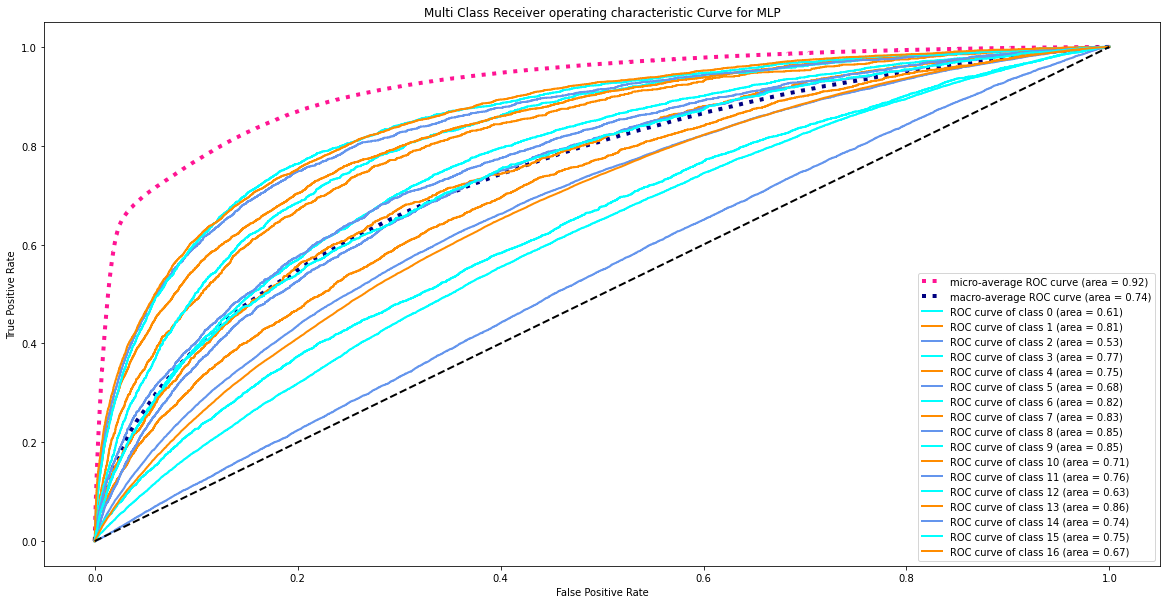

In [64]:

# Plot all ROC curves
plt.figure()
fig, ax = plt.subplots()
ax.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

ax.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=lw)
#ax.xlim([0.0, 1.0])
#ax.ylim([0.0, 1.05])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
#ax.xlabel('False Positive Rate')
#ax.ylabel('True Positive Rate')
ax.set_title('Multi Class Receiver operating characteristic Curve for MLP')
ax.legend(loc='lower right')
#prop=FontProperties().set_size('small')
fig.set_size_inches(20, 10)
plt.savefig('/content/drive/My Drive/Data Mining Assignment/graphs/roc_mlp.png')